In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [2]:
(ds, _), (tds, _) = tf.keras.datasets.mnist.load_data(path="mnist.npz")

In [3]:
ld = 32

In [4]:
input_img = Input(shape=(28*28,))
encoded = Dense(ld, activation='relu')(input_img)
decoded = Dense(28*28, activation='sigmoid')(encoded)

m = Model(input_img, decoded)
m.compile(optimizer=Adam(lr=1e-3), loss='binary_crossentropy')

In [5]:
m.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [6]:
ds = np.array((ds / 255)).astype(np.float32).reshape(-1,28*28)
tds = np.array((tds / 255)).astype(np.float32).reshape(-1,28*28)

In [7]:
ds.shape, tds.shape

((60000, 784), (10000, 784))

In [8]:
m.fit(ds, ds, batch_size=32, epochs=10, verbose=1, validation_data=(tds, tds))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2254 - val_loss: 0.1138
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1092 - val_loss: 0.0973
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0977 - val_loss: 0.0943
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0957 - val_loss: 0.0935
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0946 - val_loss: 0.0931
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0945 - val_loss: 0.0928
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0937 - val_loss: 0.0924
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0937 - val_loss: 0.0925
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0936 - val_loss: 0.0923
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.093

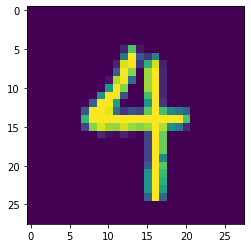

In [15]:
img = tds[np.random.choice(len(tds))]
plt.imshow(img.reshape(28,28))

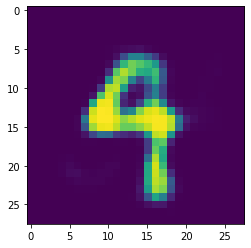

In [16]:
p = m.predict(img.reshape(1,28*28)).reshape(28,28)
plt.imshow(p)